In [1]:
using SymPy

In [2]:
using Plots

In [3]:
using Roots

In [4]:
using LinearAlgebra

In [5]:
using DifferentialEquations

#### Ordinary Differential Equations with Boundary Value Problem
###### Exercise 2
> Diberikan PDB dengan MNB berikut.
$$x''-\dfrac{1}{t}x'+\dfrac{1}{t^2}x=1$$ pada interval $[0.5,4.5]$ dengan nilai batas $x(0.5)=1$ dan $y(4.5)=2$.

Solusi aktual dari MNB di atas adalah $x(t)=t^2 - 0.2525826491t-2.528442297 t \ln t$.

2. Dengan fungsi basis pangkat 2 dan pangkat 4, carilah __fungsi__ hampiran solusi masalah nilai batas di atas menggunakan *__collocation method__*!
    1. Bandingkan fungsi hampiran tersebut dengan solusi aktual menggunakan plot ! 
    2. Gambarkan juga plot selisih fungsi hampiran tersebut dengan solusi aktual !

$$x''=
\dfrac{1}{t}x'
-\dfrac{1}{t^2}x
+1$$

In [6]:
###################################################################################################

In [7]:
# pangkat 2

$$v(t,x)=x_1 + x_2 t+ x_3 t^2$$

$$v'(t,x)=x_2 + 2 x_3 t$$

$$v''(t,x) = 2 x_3 t$$

In [8]:
###################################################################################################

$t_1 = 0.5 \quad t_2 = 1 \quad t_3 = 4.5$

$v(t_1,x)=v(0.5,x) = x_1 + x_2 (0.5)+ x_3 (0.25)^2 = x_1 + 0.5 x_2+ 0.25 x_3 = 1$

$v(t_3,x)=v(4.5,x) = x_1 + x_2 (4.5)+ x_3 (4.5)^2 = x_1 + 4.5 x_2+ 20.25 x_3 = 2$

$
\begin{align}
v''(t_2,x)
&= v(2,x)
= 2 x_3 (1)^2
= 2 x_3
= \frac{1}{t_2} \left( x_2 + 2 x_3 t_2 \right) 
- \frac{1}{t_2^2} \left( x_1 + x_2 t_2+ x_3 t_2^2 \right)
+1
\\
&= 2 x_3 = \frac{1}{(1)} \left( x_2 + 2 x_3 (1) \right) 
- \frac{1}{(1)^2} \left( x_1 + x_2 (1)+ x_3 (1)^2 \right)
+1
\\
&= 2 x_3 = \left( x_2 + 2 x_3 \right) 
- \left( x_1 + x_2 + x_3 \right)
+1
\\
&= 0 = x_2 - \left( x_1 + x_2 + x_3 \right)
+1
\\
&= x_2 + x_3 = 1
\end{align}
$

diperoleh sistem persamaan linear berupa:

$$
\begin{align}
x_1 + 0.5 x_2+ 0.25 x_3 &= 1
\\
x_1 + 4.5 x_2+ 20.25 x_3 &= 2
\\
x_2 + x_3 &= 1
\end{align}
$$

dapat ditulis dalam bentuk matriks berupa,

$$
\begin{pmatrix}
1 & 0.5 & 0.25
\\
1 & 4.5 & 20.25
\\
0 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ x_3
\end{pmatrix}
=
\begin{pmatrix}
1 \\ 2 \\1
\end{pmatrix}
$$

In [9]:
A = [1 1 0; 0.5 4.5 1; 0.25 20.25 1]
A'

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
 1.0  0.5   0.25
 1.0  4.5  20.25
 0.0  1.0   1.0

In [10]:
b = [1; 2; 1]

3-element Vector{Int64}:
 1
 2
 1

In [11]:
y = A'\b

3-element Vector{Float64}:
  0.453125
  1.1875
 -0.1875

diperoleh nilai $x_1$, $x_2$ dan $x_3$ berupa:

$$
x_1 = 1.046875
\quad
x_2 = -0.046875
\quad
x_3 = 1.6875
$$

sehingga,

$$v(t,x)=x_1 + x_2 t+ x_3 t^2$$

$$v(t,x)=1.046875 −0.046875 t+ 1.6875 t^2$$

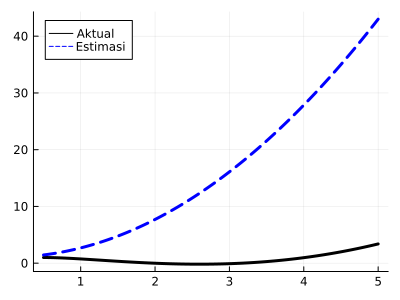

In [12]:
plot(0.5:0.01:5, t->t^2−(0.2525826491)t−(2.528442297)t*log(t), lw=3, color=:black, label="Aktual", legend=:topleft,size=(400,300))
plot!(0.5:0.01:5, t->1.046875−0.046875t+ 1.6875t^2, lw=3, color=:blue, ls=:dash, label="Estimasi")

In [13]:
###################################################################################################

In [14]:
# pangkat 4

$$w(t,x)=x_1 + x_2 t+ x_3 t^2 + x_4 t^3 + x_5 t^4$$

$$w'(t,x)=x_2 + 2 x_3 t + 3 x_4 t^2 + 4 x_5 t^3$$

$$w''(t,x) = 2 x_3  + 6 x_4 t + 12 x_5 t^2$$

In [15]:
###################################################################################################

In [16]:
4.5^4

410.0625

$t_1 = 0.5 \quad t_2 = 1 \quad t_3 = 4.5$

$
\begin{aligned}
w(t_1,x)
&= w(0.5,x)
\\
&= x_1 + x_2 (0.5)+ x_3 (0.5)^2 + x_4 (0.5)^3 + x_5 (0.5)^4 
\\
&= x_1 + 0.5 x_2 + 0.25 x_3 + 0.125 x_4 + 0.0625 x_5= 0
\end{aligned}
$

$
\begin{aligned}
w(t_3,x)
&= w(4.5,x)
\\
&= x_1 + x_2 (4.5)+ x_3 (4.5)^2 + x_4 (4.5)^3 + x_5 (4.5)^4 
\\
&= x_1 + 4.5 x_2 + 20.25 x_3 + 91.125 x_4 + 410.0625 x_5= 1
\end{aligned}
$

$
\begin{aligned}
w''(t_2,x)
&= w''(1,x)
\\
&= 2 x_3  + 6 x_4 (1) + 12 x_5 (1)^2
\\
&= 2 x_3  + 6 x_4 + 12 x_5
= \frac{1}{t_2} \left( x_2 + 2 x_3 t_2 + 3 x_4 t_2^2 + 4 x_5 t_2^3 \right) 
- \frac{1}{t_2^2} \left( x_1 + x_2 t_2+ x_3 t_2^2 + x_4 t_2^3 + x_5 t_2^4 \right)
\\
&= 2 x_3  + 6 x_4 + 12 x_5
= \left( x_2 + 2 x_3 + 3 x_4 + 4 x_5 \right) 
- \left( x_1 + x_2 + x_3 + x_4 + x_5 \right)
\\
&= x_3 + 4 x_4 + 9 x_5=0
\end{aligned}
$

diperoleh sistem persamaan linear berupa:

$$
\begin{align}
x_1 + 0.5 x_2 + 0.25 x_3 + 0.125 x_4 + 0.0625 x_5 &= 0
\\
x_1 + 4.5 x_2 + 20.25 x_3 + 91.125 x_4 + 410.0625 x_5 &= 1
\\
x_3 + 4 x_4 + 9 x_5 &= 0
\end{align}
$$

In [17]:
A_pan4 = [1 1 0; 0.5 4.5 0; 0.25 20.25 1; 0.125 91.125 4; 0.0625 40.0625 9]
A_pan4'

3×5 adjoint(::Matrix{Float64}) with eltype Float64:
 1.0  0.5   0.25   0.125   0.0625
 1.0  4.5  20.25  91.125  40.0625
 0.0  0.0   1.0    4.0     9.0

In [18]:
b_pan4 = [0; 1; 0]

3-element Vector{Int64}:
 0
 1
 0

In [19]:
y_pan4 = A_pan4'\b_pan4

5-element Vector{Float64}:
 -0.0018210565881717864
 -3.297125778497427e-5
  0.0022913427489514894
  0.013172077360283842
 -0.006108850243342983

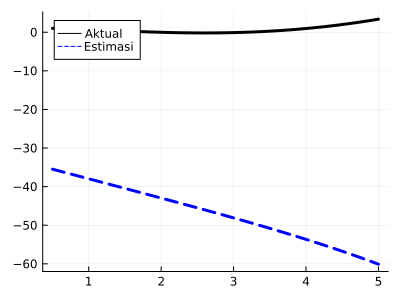

In [20]:
plot(0.5:0.01:5, t->t^2−(0.2525826491)t−(2.528442297)t*log(t), lw=3, color=:black, label="Aktual", legend=:topleft,size=(400,300))
plot!(0.5:0.01:5, t->-0.0018210565881717864-3.297125778497427*(10)-5*t+ 0.0022913427489514894*t^2 + 0.013172077360283842*t^3 + -0.006108850243342983*t^4, lw=3, color=:blue, ls=:dash, label="Estimasi")